# Optimizer Example
MNIST CNN example showing comparison between *newer* optimizers.

Richard Henry, 15-Jul-2024 

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.16.2'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

# MNIST CNN
Here we are looking at optimizers that appeared *after* Adam.

Adapted from Keras Documentation.
https://keras.io/examples/vision/mnist_convnet/

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)
batch_size = 128
num_epochs = 15

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Build & train model function
def model_build(myOpti,
                myClas,
                myShap,
                myBatc,
                myEpoc,
                myxTra,
                myyTra,
                myxTes,
                myyTes):
    #Build it exactly the same every time
    tf.random.set_seed(19) 
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=myShap),
            #tf.keras.layers.Rescaling(1.0/255),
            tf.keras.layers.Conv2D(32, 
                                   kernel_size=(3, 3), 
                                   activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Conv2D(64, 
                                   kernel_size=(3, 3), 
                                   activation="relu"),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(myClas, 
                                  activation="softmax"),
        ]
    )
    model.compile(loss="categorical_crossentropy", 
                  optimizer=myOpti, 
                  metrics=["accuracy"])
    myHis=model.fit(myxTra, 
                    myyTra, 
                    batch_size=myBatc, 
                    epochs=myEpoc, 
                    validation_split=0.1)
    score = model.evaluate(myxTes, 
                           myyTes, 
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    return myHis

### First Model, LION

In [7]:
%%time
h0=model_build('lion',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.7893 - loss: 0.7023 - val_accuracy: 0.9862 - val_loss: 0.0494
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9717 - loss: 0.0932 - val_accuracy: 0.9883 - val_loss: 0.0366
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9776 - loss: 0.0703 - val_accuracy: 0.9897 - val_loss: 0.0369
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9800 - loss: 0.0647 - val_accuracy: 0.9890 - val_loss: 0.0379
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9827 - loss: 0.0558 - val_accuracy: 0.9915 - val_loss: 0.0309
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9813 - loss: 0.0561 - val_accuracy: 0.9918 - val_loss: 0.0317
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9832 - loss: 0.0548 - val_accuracy: 0.9893 - val_loss: 0.0352
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9836 - loss: 0.0531 - 

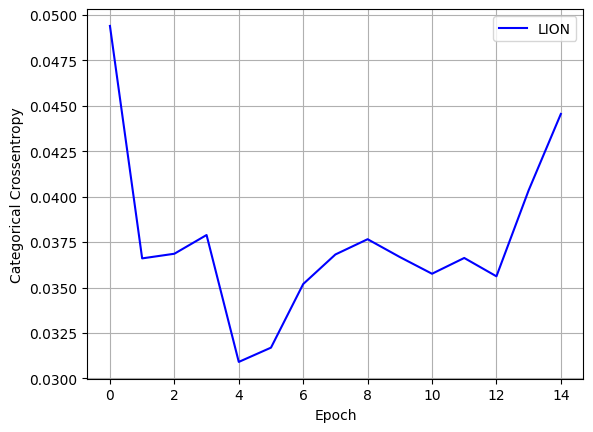

In [8]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION'])
plt.grid()
plt.show()

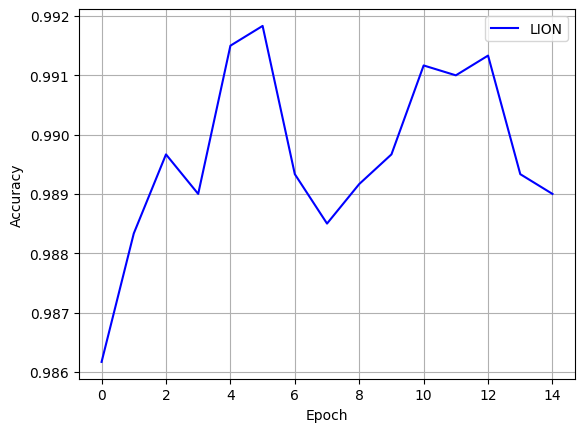

In [9]:
plt.plot(h0.history['val_accuracy'],color='blue',linestyle='solid')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION'])
plt.grid()
plt.show()

#### Commentary
Lorem Ipsum
### Second Model, AdaFactor

In [10]:
%%time
h1=model_build('adafactor',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 25ms/step - accuracy: 0.2716 - loss: 2.1329 - val_accuracy: 0.8277 - val_loss: 1.1655
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.6874 - loss: 1.0911 - val_accuracy: 0.9073 - val_loss: 0.4363
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8161 - loss: 0.5908 - val_accuracy: 0.9340 - val_loss: 0.2652
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 13s 31ms/step - accuracy: 0.8691 - loss: 0.4211 - val_accuracy: 0.9485 - val_loss: 0.2003
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.8967 - loss: 0.3351 - val_accuracy: 0.9565 - val_loss: 0.1651
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9105 - loss: 0.2855 - val_accuracy: 0.9608 - val_loss: 0.1436
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9232 - loss: 0.2519 - val_accuracy: 0.9642 - val_loss: 0.1295
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 28ms/step - accuracy: 0.9281 - loss: 0.2307 - 

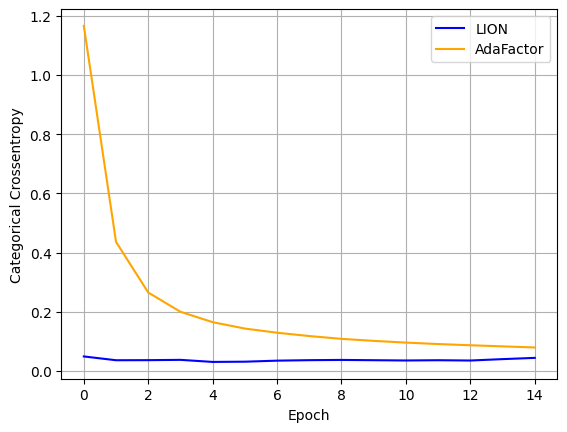

In [11]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h1.history['val_loss'],color='orange',linestyle='solid')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor'])
plt.grid()
plt.show()

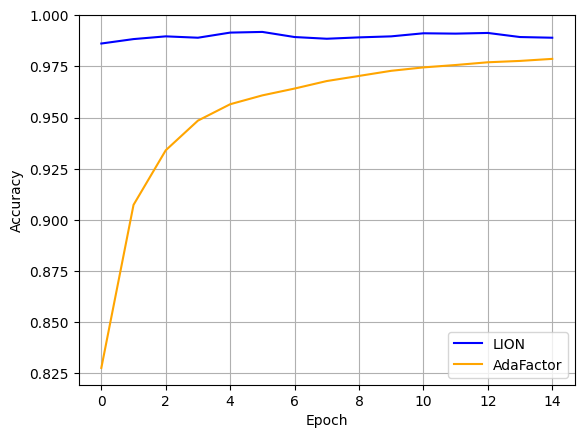

In [12]:
plt.plot(h0.history['val_accuracy'],color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'],color='orange',linestyle='solid')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor'])
plt.grid()
plt.show()

#### Commentary
Lorem Impsum
### Third Model, Adam with Weight Decay

In [13]:
%%time
h2=model_build('adamw',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 14s 26ms/step - accuracy: 0.7684 - loss: 0.7661 - val_accuracy: 0.9777 - val_loss: 0.0840
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9618 - loss: 0.1243 - val_accuracy: 0.9845 - val_loss: 0.0607
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9717 - loss: 0.0903 - val_accuracy: 0.9858 - val_loss: 0.0503
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9751 - loss: 0.0795 - val_accuracy: 0.9870 - val_loss: 0.0462
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9794 - loss: 0.0661 - val_accuracy: 0.9867 - val_loss: 0.0431
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9816 - loss: 0.0583 - val_accuracy: 0.9883 - val_loss: 0.0398
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9829 - loss: 0.0539 - val_accuracy: 0.9887 - val_loss: 0.0375
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 12s 28ms/step - accuracy: 0.9837 - loss: 0.0506 - v

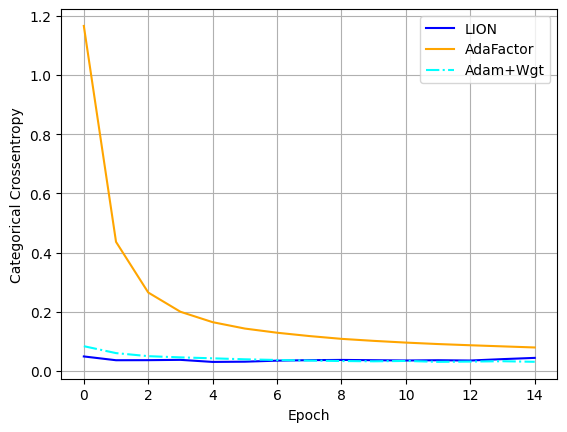

In [14]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h1.history['val_loss'],color='orange',linestyle='solid')
plt.plot(h2.history['val_loss'],color='cyan',linestyle='dashdot')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt'])
plt.grid()
plt.show()

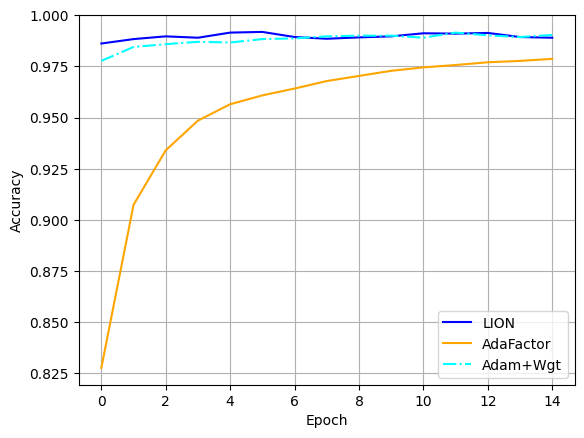

In [15]:
plt.plot(h0.history['val_accuracy'],color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'],color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'],color='cyan',linestyle='dashdot')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt'])
plt.grid()
plt.show()

#### Commentary
Lorem Ipsum
### 4th Model, Adam

In [16]:
%%time
h3=model_build('adam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 15s 27ms/step - accuracy: 0.7638 - loss: 0.7648 - val_accuracy: 0.9765 - val_loss: 0.0885
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.9592 - loss: 0.1318 - val_accuracy: 0.9838 - val_loss: 0.0631
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.9709 - loss: 0.0948 - val_accuracy: 0.9858 - val_loss: 0.0504
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 11s 25ms/step - accuracy: 0.9762 - loss: 0.0770 - val_accuracy: 0.9870 - val_loss: 0.0444
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9782 - loss: 0.0673 - val_accuracy: 0.9893 - val_loss: 0.0392
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.9815 - loss: 0.0586 - val_accuracy: 0.9882 - val_loss: 0.0412
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 8s 20ms/step - accuracy: 0.9828 - loss: 0.0539 - val_accuracy: 0.9902 - val_loss: 0.0366
Epoch 8/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 9s 22ms/step - accuracy: 0.9840 - loss: 0.0511 - val

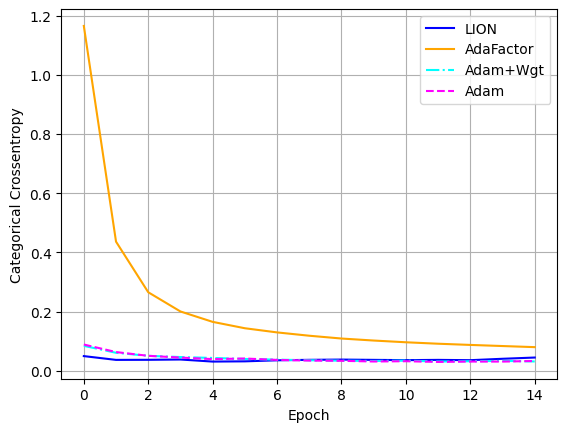

In [17]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h1.history['val_loss'],color='orange',linestyle='solid')
plt.plot(h2.history['val_loss'],color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_loss'],color='magenta',linestyle='dashed')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt','Adam'])
plt.grid()
plt.show()

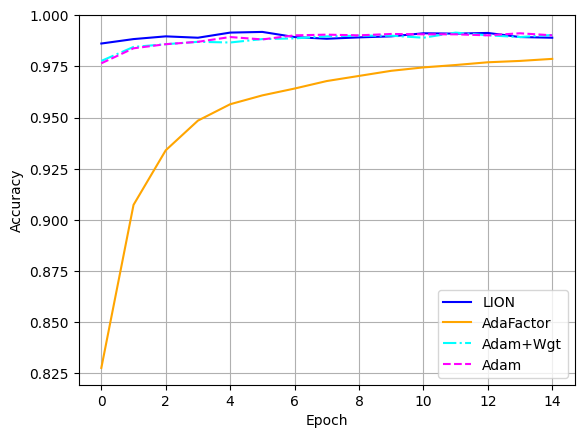

In [18]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt','Adam'])
plt.grid()
plt.show()

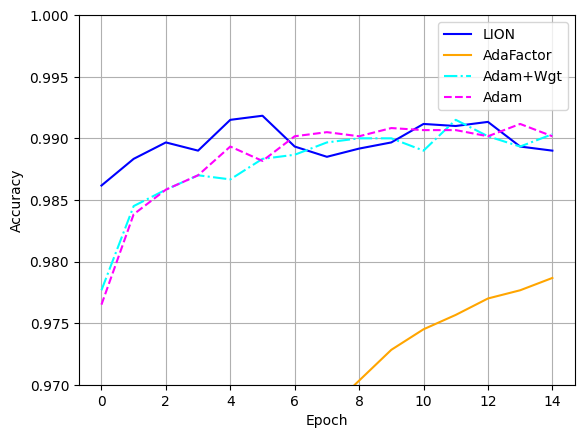

In [19]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['LION','AdaFactor','Adam+Wgt','Adam'])
plt.grid()
plt.ylim([0.97,1.00])
plt.show()

#### Comment
lorem ipsum
# Conclusions
Blah blah blah